# Trends in Stackoverflow

##### 18BCE1302, 18BCE1309

In [1]:
%matplotlib inline

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
from networkx.algorithms import community

In [2]:
# Reading the datasets
G = nx.Graph()
df_nodes = pd.read_csv('datasets/stack_network_nodes.csv')
df_edges = pd.read_csv('datasets/stack_network_edges.csv')

# Adding edges and nodes from dataset to graph G
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['Source'], row['Target'], row['Weight'])])

In [3]:
# color coded by groups
def draw_graph(G,size):
    nodes = G.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}
    node_color= [color_map[d['group']] for n,d in G.nodes(data=True)]
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    pos = nx.drawing.spring_layout(G,k=0.80,iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G,pos=pos,node_color=node_color,node_size=node_size,edge_color='#FFDEA2')
    plt.show()

According to Stack Overflow Survey 2019 https://insights.stackoverflow.com/survey/2021#most-popular-technologies the most popular Technologies

In [4]:
lovedwebfrwrks = ['javascript','html','css','sql',
                    'java','node.js','typescript','c#','bash',
                    'c++','php','c']

In [5]:
# Create a list of all nodes in loved_frameworks and their neighbors
frameworks = []
for temp in lovedwebfrwrks:
    neighbors = G.neighbors(temp)
    frameworks.extend(neighbors)

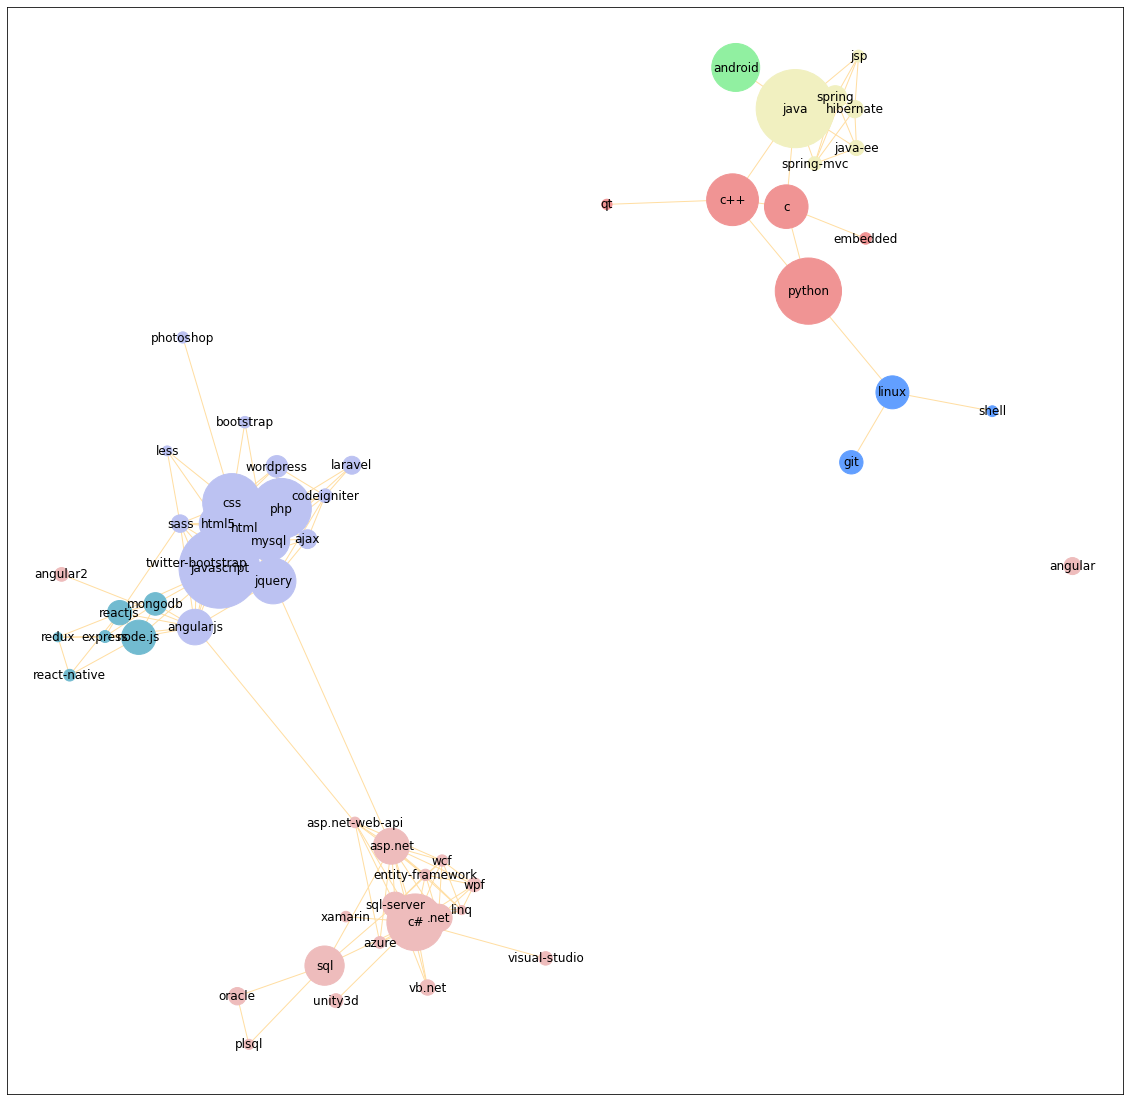

In [6]:
# Graph for loved_framworks and their neighbors
mostlovedwebplatforms_graph = G.subgraph(set(frameworks))

draw_graph(mostlovedwebplatforms_graph,size=(20,20))

According to Stack Overflow Survey 2019 https://insights.stackoverflow.com/survey/2021#technology-most-loved-dreaded-and-wanted the most loved and wanted Web Frameworks

In [11]:
lovedwebfrwrks = ['typescript','bash','python','swift','node.js',
                    'go','sql','c#','ruby',
                    'javascript','html','css']

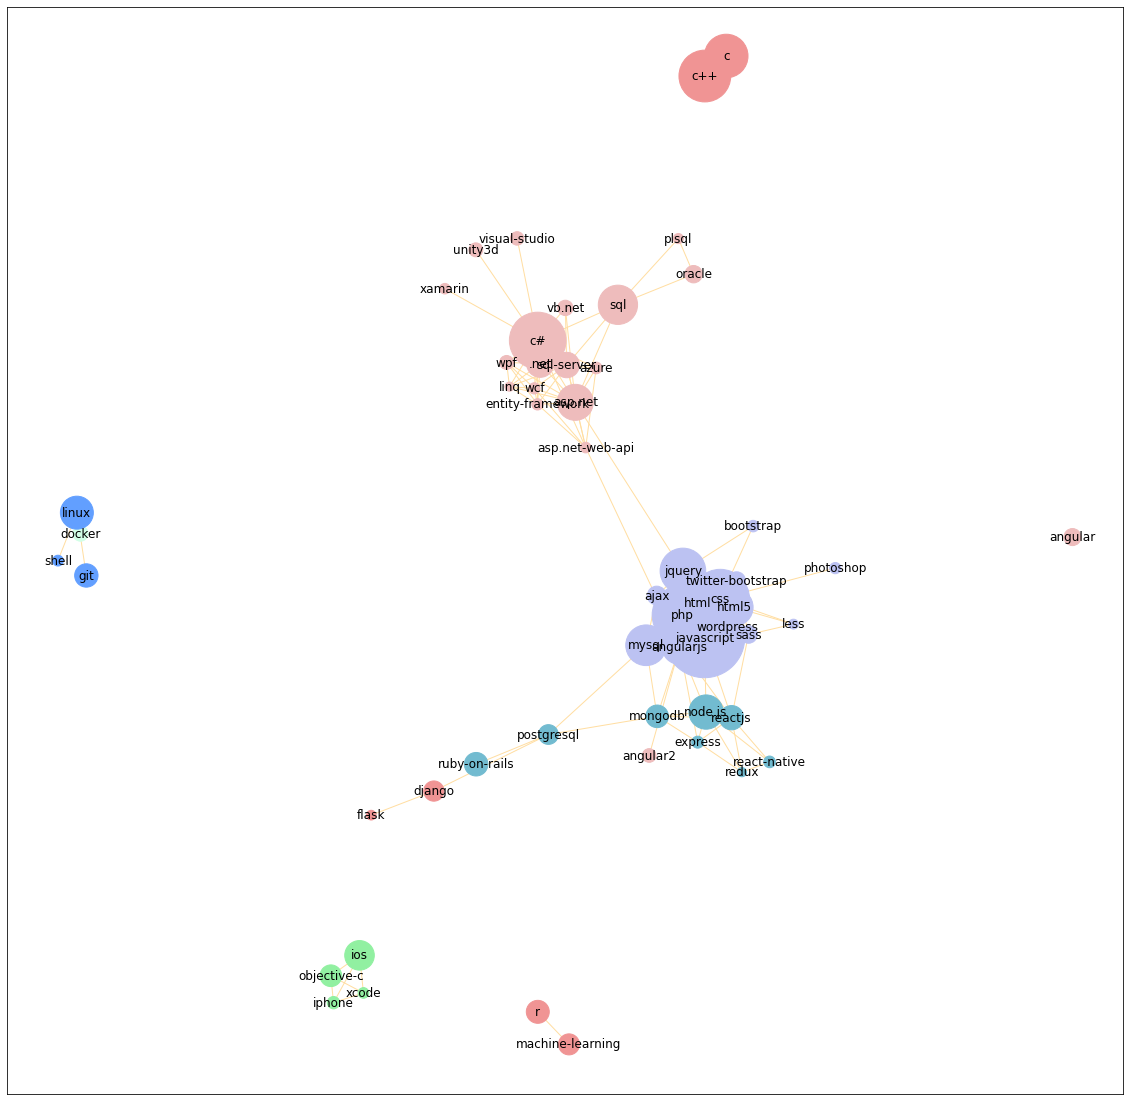

In [12]:
# Create a list of all nodes in loved_frameworks and their neighbors
frameworks = []
for temp in lovedwebfrwrks:
    neighbors = G.neighbors(temp)
    frameworks.extend(neighbors)
    
# Graph for loved_framworks and their neighbors
mostlovedwebplatforms_graph = G.subgraph(set(frameworks))

draw_graph(mostlovedwebplatforms_graph,size=(20,20))

According to Stack Overflow Survey 2019 https://insights.stackoverflow.com/survey/2021#technology-top-paying-technologies the top Paying technologies of 2021

In [17]:
top_paying = ['ruby','sql','go','scala','bash',
                    'powershell','objective-c','r','python',
                    'typescript','swift','c#']

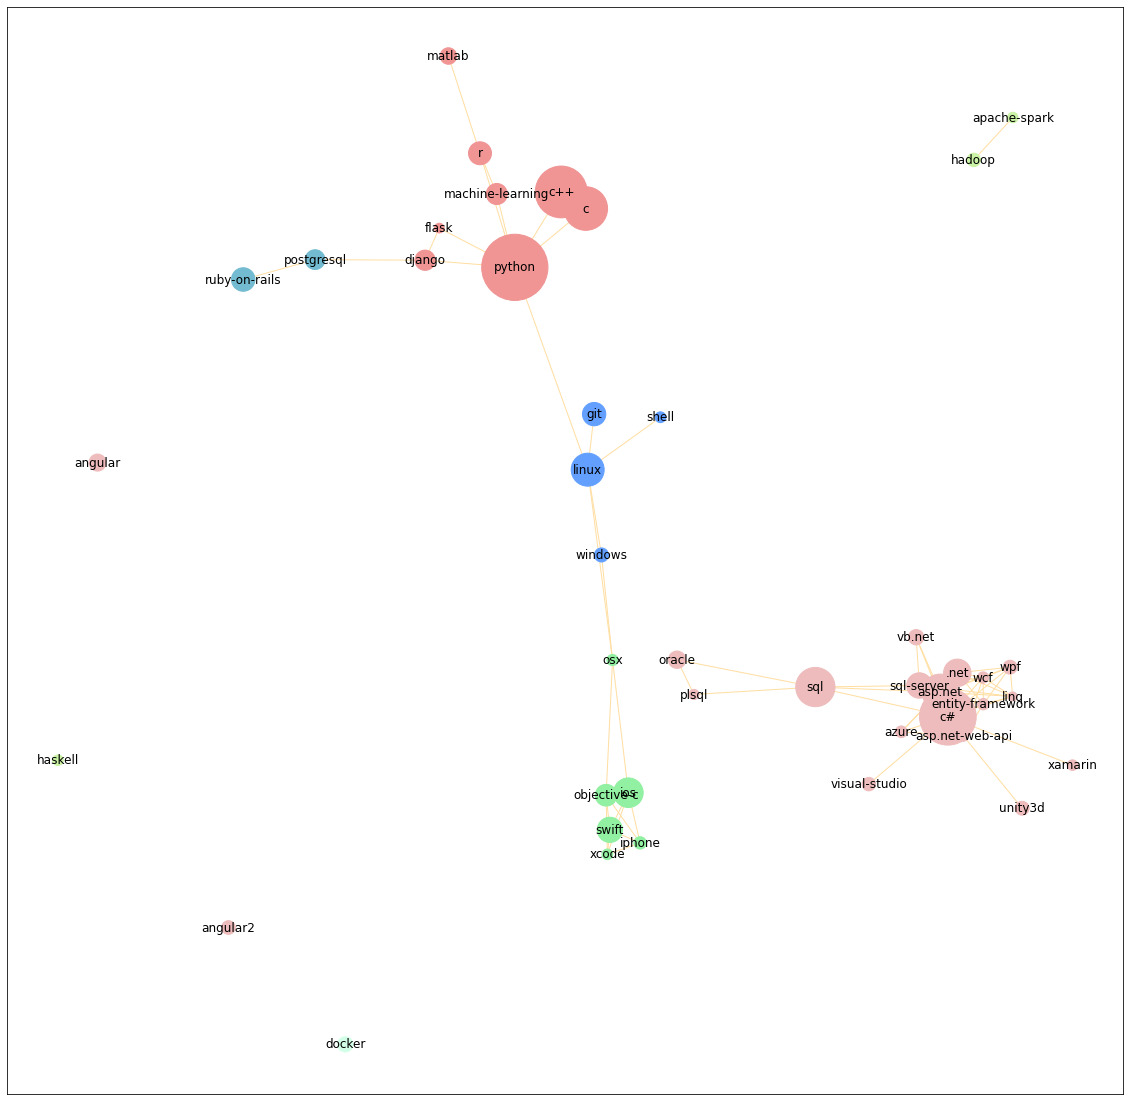

In [18]:
# Create a list of all nodes in loved_frameworks and their neighbors
technologies = []
for temp in top_paying:
    neighbors = G.neighbors(temp)
    technologies.extend(neighbors)
    
# Graph for loved_framworks and their neighbors
top_payed_technologies_graph = G.subgraph(set(technologies))

draw_graph(top_payed_technologies_graph,size=(20,20))